## Load Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
SB_WIDTH = 2
SAMPLE_SIZE = 20000
BINS = 60

In [3]:
#data = np.load("../data/processed/np_bg_SR_" + str(SB_WIDTH) + ".npy")
#data = np.load("../data/processed/np_bg_SB_" + str(SB_WIDTH) + ".npy")
data = np.load("../data/processed/np_sig_SR_" + str(SB_WIDTH) + ".npy")
#data = np.load("../data/processed/np_sig_SB_" + str(SB_WIDTH) + ".npy")

## Kinematic Features

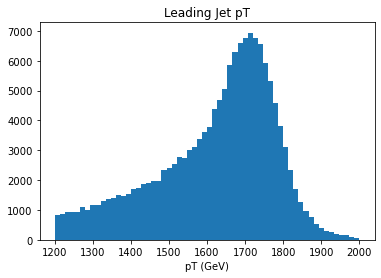

In [4]:
plt.close()
plt.title("Leading Jet pT")
plt.xlabel("pT (GeV)")
plt.hist(data[:,0], bins = BINS, range = (1200, 2000))
plt.show()

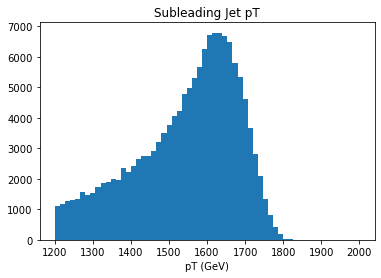

In [5]:
plt.close()
plt.title("Subleading Jet pT")
plt.xlabel("pT (GeV)")
plt.hist(data[:,3], bins = BINS, range = (1200, 2000))
plt.show()

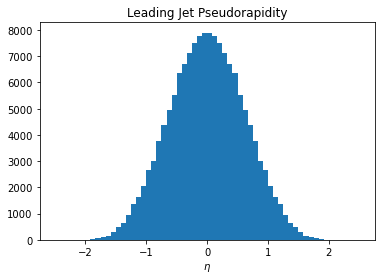

In [6]:
plt.close()
plt.title("Leading Jet Pseudorapidity")
plt.xlabel("$\\eta$")
plt.hist(data[:,1], bins = BINS, range = (-2.5, 2.5))
plt.show()

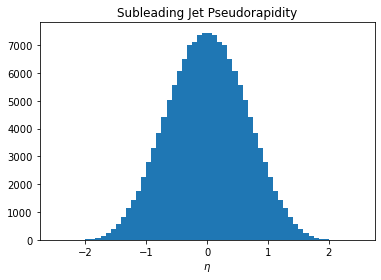

In [7]:
plt.close()
plt.title("Subleading Jet Pseudorapidity")
plt.xlabel("$\\eta$")
plt.hist(data[:,4], bins = BINS, range = (-2.5, 2.5))
plt.show()

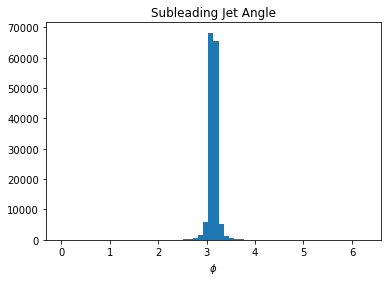

In [8]:
plt.close()
plt.title("Subleading Jet Angle")
plt.xlabel("$\\phi$")
plt.hist(data[:,5], bins = BINS, range = (0, 2*np.pi))
plt.show()

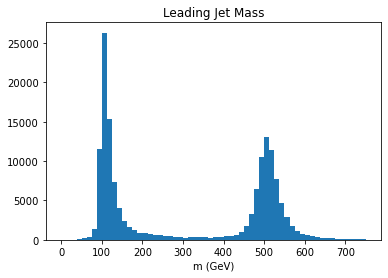

In [9]:
plt.close()
plt.title("Leading Jet Mass")
plt.xlabel("m (GeV)")
plt.hist(data[:,2], bins = BINS, range = (0, 750))
plt.show()

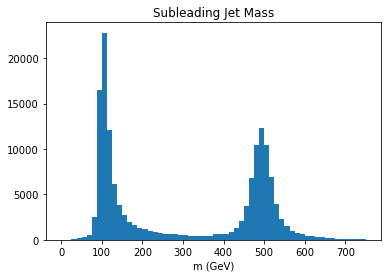

In [10]:
plt.close()
plt.title("Subleading Jet Mass")
plt.xlabel("m (GeV)")
plt.hist(data[:,6], bins = BINS, range = (0, 750))
plt.show()

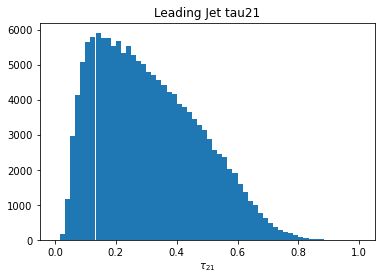

In [11]:
plt.close()
plt.title("Leading Jet tau21")
plt.xlabel("$\\tau_{21}$")
plt.hist(data[:,7], bins = BINS, range = (0, 1))
plt.show()

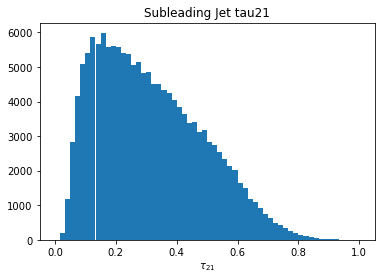

In [12]:
plt.close()
plt.title("Subleading Jet tau21")
plt.xlabel("$\\tau_{21}$")
plt.hist(data[:,8], bins = BINS, range = (0, 1))
plt.show()

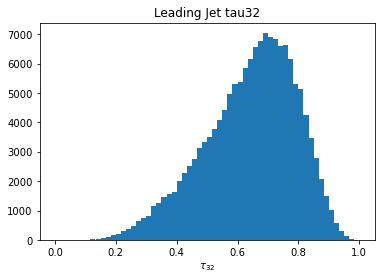

In [13]:
plt.close()
plt.title("Leading Jet tau32")
plt.xlabel("$\\tau_{32}$")
plt.hist(data[:,9], bins = BINS, range = (0, 1))
plt.show()

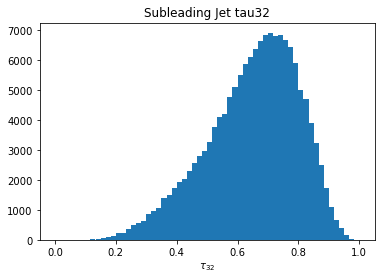

In [14]:
plt.close()
plt.title("Subleading Jet tau32")
plt.xlabel("$\\tau_{32}$")
plt.hist(data[:,10], bins = BINS, range = (0, 1))
plt.show()

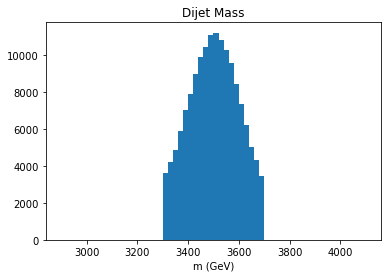

In [15]:
plt.close()
plt.title("Dijet Mass")
plt.xlabel("m (GeV)")
plt.hist(data[:,11], bins = BINS, range = (2900, 4100))
plt.show()